## Проект классификация почты. Gradient Boosting.

Подготовка данных

In [51]:
# записываем файлы в один csv
import os
import re
data = 'data/data_project'
# data_csv= 
with open('data_mail.csv', "a+", encoding='utf-8') as new:
    new.write('e-mail;label' + '\n')
for i in os.listdir(data):
    dir = data + "/" + i
    with open(dir, "r", encoding='utf-8') as f:
        letter = f.readlines()
        for string in list(letter):
            with open('data_mail.csv', "a+", encoding='utf-8') as new:
                new_string = re.sub(r';', '', string)
                new.write('\'' + re.sub(r'\n', '', new_string) + '\'' + ', ' + re.sub('.txt', '', i) + "\n")

In [12]:
os.listdir(data)

['fes.txt',
 'ge.txt',
 'serv.txt',
 'gu.txt',
 'auth.txt',
 'dou.txt',
 'soc.txt',
 'med.txt',
 'sec.txt',
 'obr.txt']

In [1]:
import pandas as pd

dataset = pd.read_csv('data_mail.csv')
dataset

,letter,tag
0,Добрый день! Провели проверку в рамках инциден...,auth
1,Добрый день Провели проверку в рамках инцидент...,auth
2,Добрый день! Данный пользователь не блокирован...,auth
3,Добрый день! В соответствии с проверкой иници...,auth
4,В указанном вами сообщении придлагается ввест...,auth
...,...,...
3152,Добрый день! Есть несколько видов распоряжения...,soc
3153,Добрый день! Уточните пожалуйста проблему с пр...,soc
3154,Добрый день! К сожалению мы не предоставляем и...,soc
3155,Добрый день! Данная услуга является федерально...,soc


Посмотрим распределение классов

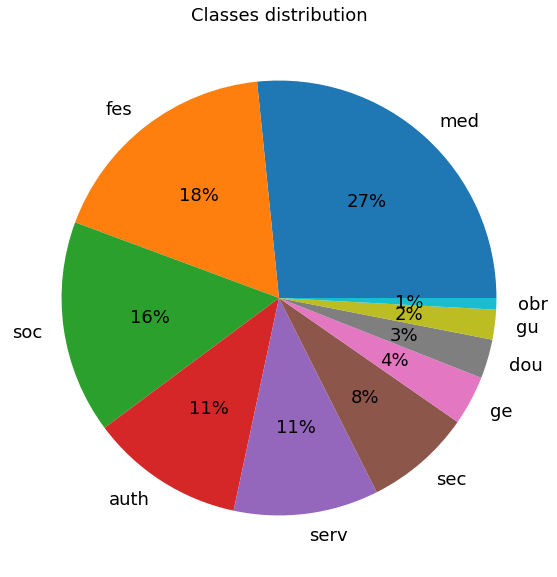

In [2]:
import matplotlib.pyplot as plt
classes =pd.value_counts(dataset["tag"])
plt.figure(figsize=(10,10))


classes.plot(kind = 'pie',  autopct='%0.f%%', fontsize = 18) 

plt.title("Classes distribution", fontsize = 18)

plt.ylabel('')

plt.show()

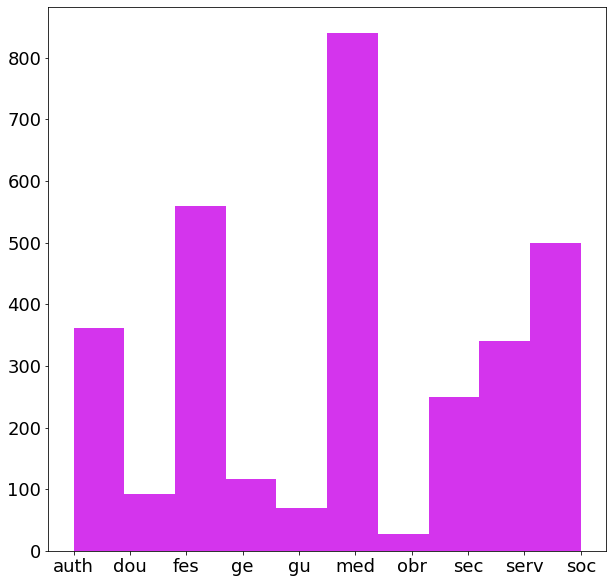

In [15]:
import matplotlib.pyplot as plt
# classes =pd.value_counts(dataset["tag"])
plt.figure(figsize=(10,10))


# classes.plot(kind = 'hist', fontsize = 18) 
plt.hist(dataset["tag"], color = '#d434ed')

# plt.title("Classes distribution", fontsize = 18)

# plt.text(axis=1, fontsize = 18)
plt.tick_params(labelsize=18)

plt.ylabel('')

plt.show()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords

stopwords = set(nltk_stopwords.words('russian') )
vectorizer = TfidfVectorizer(stop_words=stopwords)
X_trans = vectorizer.fit(dataset['letter'])
X = X_trans.transform(dataset['letter'])

In [11]:
text = [
    'Добрый день! Подскажите, пожалуйста, адрес и номер поликлиники',
    'Какой запрос у вас не отправляется', 
    'Где вы подаете заявление на выплату?',
    'Проверить очередь в детский сад вы можете на главной странице', 
    'У вас не происходит вход после ввода пароля?',
    'Ваша учетная запись должна быть подтвержденной', 
    'К сожалению, все слоты определяются только в мед учреждениях',
    'Региональный материнский капитал оформить можно'
]

text_ex = X_trans.transform(text)

In [19]:
import pandas as pd
# print(X_trans.get_feature_names())
print(X.toarray())
print(pd.DataFrame(X.toarray(), 
columns=X_trans.get_feature_names(), 
index=corpus_index))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                                                     00  000  0000000  00050  \
  (0, 13072)\t0.09682737099485896\n  (0, 12958)...  0.0  0.0      0.0    0.0   
  (0, 13102)\t0.0679399090862413\n  (0, 13082)\...  0.0  0.0      0.0    0.0   
  (0, 12863)\t0.11837893729837391\n  (0, 12138)...  0.0  0.0      0.0    0.0   
  (0, 12641)\t0.1767366321841804\n  (0, 12375)\...  0.0  0.0      0.0    0.0   
  (0, 12801)\t0.057189235210929786\n  (0, 12380...  0.0  0.0      0.0    0.0   
...                                                 ...  ...      ...    ...   
  (0, 12481)\t0.10184203820915372\n  (0, 12479)...  0.0  0.0      0.0    0.0   
  (0, 12570)\t0.34197564580633755\n  (0, 10015)...  0.0  0.0      0.0    0.0   
  (0, 13099)\t0.0434185850349124\n  (0, 12990)\...  0.0  0.0      0.0    0.0   
  (0, 13119)\t0.06086876315145537\n  (0, 130

In [15]:
feature_names = X_trans.get_feature_names()
corpus_index = [n for n in X]
import pandas as pd
df = pd.DataFrame(X.todense(), index=corpus_index, columns=feature_names)
print(df)

                                                     00  000  0000000  00050  \
  (0, 13072)\t0.09682737099485896\n  (0, 12958)...  0.0  0.0      0.0    0.0   
  (0, 13102)\t0.0679399090862413\n  (0, 13082)\...  0.0  0.0      0.0    0.0   
  (0, 12863)\t0.11837893729837391\n  (0, 12138)...  0.0  0.0      0.0    0.0   
  (0, 12641)\t0.1767366321841804\n  (0, 12375)\...  0.0  0.0      0.0    0.0   
  (0, 12801)\t0.057189235210929786\n  (0, 12380...  0.0  0.0      0.0    0.0   
...                                                 ...  ...      ...    ...   
  (0, 12481)\t0.10184203820915372\n  (0, 12479)...  0.0  0.0      0.0    0.0   
  (0, 12570)\t0.34197564580633755\n  (0, 10015)...  0.0  0.0      0.0    0.0   
  (0, 13099)\t0.0434185850349124\n  (0, 12990)\...  0.0  0.0      0.0    0.0   
  (0, 13119)\t0.06086876315145537\n  (0, 13011)...  0.0  0.0      0.0    0.0   
  (0, 12839)\t0.12298593379872738\n  (0, 12801)...  0.0  0.0      0.0    0.0   

                                       

In [ ]:
vec = TfidfVectorizer() vec.fit(corpus) trainx = tf.transform(train) testx = tf.transform(test)

In [14]:
examples = [
    "Добрый день! Запись к врачу на портале доступна только в период 14 дней до дня приема.",
    "Добрый день! Для отмены записи к врачу, Вам нужно перейти в личный кабинет (ваше ФИО в правом верхнем углу), раздел Записи на прием. Прямая ссылка https://uslugi27.ru/nd/lk/my/queue.htm Выбрать соответствующую запись и нажать кнопку отменить",
    "Добрый день!Вы обратились в техническую поддержку портала региональных государственных услуг. К сожалению, мы не можем подсказать по вопросу задержки выплат.Вам нужно обратиться в отдел социальной защиты, в который вы подали заявление. ",
    "Данные о дате рождения подгружаются автоматически с вашего личного кабинета и учетной записи в ЕСИА. Убедитесь, пожалуйста, что у вас указана дата рождения в профиле.",
    "Добрый день!Для того, чтобы узнать очередь в детский сад необходимо воспользоваться следующей услугой: https://uslugi27.ru/nd/lk/dou.htmВы также можете найти ее на главной странице портала uslugi27.ru в разделе популярное.Название: Узнать номер очереди в детский сад.."
]

test_examples = X_trans.transform(examples)

In [15]:
test_examples.shape

(5, 13151)

In [16]:
print(test_examples.shape)
print(X.shape)

(5, 13151)
(3157, 13151)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, dataset["tag"], test_size=0.2, random_state=1442)

In [18]:
display(X_train.toarray())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
%%time 
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=10, verbose=5)
#  n_iter_no_change=15, tol=0.00001, 
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5325            7.39m
         2           1.3300            7.35m
         3           1.1732            7.26m
         4           1.0512            7.21m
         5           0.9556            7.18m
         6           0.8798            7.15m
         7           0.8142            7.13m
         8           0.7572            7.11m
         9           0.7076            7.10m
        10           0.6575            7.08m
        11           0.6198            7.18m
        12           0.5853            7.31m
        13           0.5546            7.42m
        14           0.5240            7.51m
        15           0.4962            7.55m
        16           0.4717            7.60m
        17           0.4493            7.67m
        18           0.4293            7.71m
        19           0.4126            7.73m
        20           0.3956            7.76m
        21           0.3830            7.81m
        2

       183           0.0543            6.65m
       184           0.0539            6.65m
       185           0.0535            6.65m
       186           0.0532            6.64m
       187           0.0528            6.64m
       188           0.0523            6.63m
       189           0.0519            6.63m
       190           0.0515            6.62m
       191           0.0512            6.61m
       192           0.0507            6.60m
       193           0.0503            6.60m
       194           0.0499            6.59m
       195           0.0496            6.59m
       196           0.0494            6.58m
       197           0.0490            6.57m
       198           0.0486            6.56m
       199           0.0482            6.55m
       200           0.0479            6.54m
       201           0.0475            6.54m
       202           0.0472            6.53m
       203           0.0467            6.52m
       204           0.0464            6.52m
       205

       366           0.0184            5.18m
       367           0.0183            5.17m
       368           0.0182            5.16m
       369           0.0182            5.15m
       370           0.0181            5.15m
       371           0.0180            5.14m
       372           0.0179            5.13m
       373           0.0179            5.12m
       374           0.0178            5.11m
       375           0.0178            5.10m
       376           0.0177            5.09m
       377           0.0176            5.08m
       378           0.0175            5.07m
       379           0.0175            5.06m
       380           0.0174            5.05m
       381           0.0173            5.04m
       382           0.0172            5.04m
       383           0.0172            5.03m
       384           0.0171            5.02m
       385           0.0170            5.01m
       386           0.0170            5.00m
       387           0.0169            4.99m
       388

       549           0.0112            3.68m
       550           0.0111            3.67m
       551           0.0111            3.67m
       552           0.0111            3.66m
       553           0.0111            3.66m
       554           0.0111            3.65m
       555           0.0111            3.64m
       556           0.0110            3.64m
       557           0.0110            3.63m
       558           0.0110            3.62m
       559           0.0110            3.62m
       560           0.0110            3.61m
       561           0.0110            3.60m
       562           0.0110            3.60m
       563           0.0109            3.59m
       564           0.0109            3.58m
       565           0.0109            3.57m
       566           0.0109            3.56m
       567           0.0109            3.56m
       568           0.0109            3.55m
       569           0.0109            3.54m
       570           0.0108            3.54m
       571

       732           0.0094            2.19m
       733           0.0094            2.18m
       734           0.0094            2.17m
       735           0.0094            2.16m
       736           0.0094            2.16m
       737           0.0094            2.15m
       738           0.0094            2.14m
       739           0.0094            2.14m
       740           0.0094            2.13m
       741           0.0094            2.12m
       742           0.0094            2.11m
       743           0.0094            2.11m
       744           0.0094            2.10m
       745           0.0094            2.09m
       746           0.0094            2.08m
       747           0.0093            2.07m
       748           0.0093            2.06m
       749           0.0093            2.06m
       750           0.0093            2.05m
       751           0.0093            2.04m
       752           0.0093            2.03m
       753           0.0093            2.03m
       754

       915           0.0089           42.16s
       916           0.0089           41.66s
       917           0.0089           41.17s
       918           0.0089           40.67s
       919           0.0089           40.18s
       920           0.0089           39.68s
       921           0.0089           39.19s
       922           0.0089           38.69s
       923           0.0089           38.20s
       924           0.0089           37.70s
       925           0.0089           37.20s
       926           0.0089           36.71s
       927           0.0089           36.21s
       928           0.0089           35.72s
       929           0.0089           35.22s
       930           0.0089           34.73s
       931           0.0089           34.23s
       932           0.0089           33.74s
       933           0.0089           33.24s
       934           0.0089           32.75s
       935           0.0089           32.27s
       936           0.0089           31.79s
       937

GradientBoostingClassifier(n_estimators=1000, random_state=10, verbose=5)

In [20]:
from sklearn.metrics import classification_report
gb_y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

        auth       0.96      0.99      0.97        72
         dou       1.00      0.94      0.97        16
         fes       0.98      1.00      0.99       101
          ge       1.00      0.95      0.98        22
          gu       1.00      1.00      1.00        13
         med       1.00      0.99      0.99       182
         obr       1.00      1.00      1.00         4
         sec       0.98      0.96      0.97        48
        serv       0.98      0.98      0.98        66
         soc       0.98      0.99      0.99       108

    accuracy                           0.99       632
   macro avg       0.99      0.98      0.98       632
weighted avg       0.99      0.99      0.99       632



In [25]:
text = [
    'Добрый день! Подскажите, пожалуйста, адрес и номер поликлиники',
    'Какой запрос у вас не отправляется', 
    'Где вы подаете заявление на выплату?',
    'Проверить очередь в детский сад вы можете на главной странице', 
    'У вас не происходит вход после ввода пароля?',
    'Ваша учетная запись должна быть подтвержденной', 
    'К сожалению, все слоты определяются только в мед учреждениях',
    'Региональный материнский капитал оформить можно'
]

text_ex = X_trans.transform(text)
gb_clf.predict(text_ex)

array(['auth', 'fes', 'soc', 'dou', 'auth', 'auth', 'fes', 'soc'],
      dtype=object)

In [27]:
examples = [
    "Добрый день! Запись к врачу на портале доступна только в период 14 дней до дня приема.",
    "Добрый день! Для отмены записи к врачу, Вам нужно перейти в личный кабинет (ваше ФИО в правом верхнем углу), раздел Записи на прием. Прямая ссылка https://uslugi27.ru/nd/lk/my/queue.htm Выбрать соответствующую запись и нажать кнопку отменить",
    "Добрый день! Подскажите, пожалуйста, номер и дату запроса, который у вас не отправляется, а также ведосмтво-получатель",
    "Добрый день!Вы обратились в техническую поддержку портала региональных государственных услуг. К сожалению, мы не можем подсказать по вопросу задержки выплат.Вам нужно обратиться в отдел социальной защиты, в который вы подали заявление. ",
    "Данные о дате рождения подгружаются автоматически с вашего личного кабинета и учетной записи в ЕСИА. Убедитесь, пожалуйста, что у вас указана дата рождения в профиле.",
    "Добрый день!Для того, чтобы узнать очередь в детский сад необходимо воспользоваться следующей услугой: https://uslugi27.ru/nd/lk/dou.htmВы также можете найти ее на главной странице портала uslugi27.ru в разделе популярное.Название: Узнать номер очереди в детский сад..",
    "Добрый день! Региональный материнский капитал оформить можно через услугу на главной странице.",
    "Добрый день! Запись в первый класс станет доступна 26-го апреля в 00:00, если перейдете к услуге, сможете посмотреть инструкцию по заполнению заявления."
]

test_examples = X_trans.transform(examples)
pred = gb_clf.predict(test_examples)
print(pred)

['med' 'med' 'fes' 'soc' 'auth' 'dou' 'soc' 'obr']


In [25]:
pred = gb_clf.predict(test_examples)

In [26]:
pred

array(['med', 'med', 'fes', 'soc', 'auth', 'dou', 'soc', 'obr'],
      dtype=object)

In [28]:
import joblib
joblib.dump(gb_clf, 'my_gb_model.pkl')

['my_gb_model.pkl']